<a href="https://colab.research.google.com/github/kaifoerster/ML_Lab_1_Group-A/blob/main/Lab_Session_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Introduction to feed-forward neural networks</h2>
</div>





# scikit-learn


`scikit-learn` is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities.

### Loading the data



In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import mean_squared_error, mean_absolute_error

GLOBAL_RANDOM_STATE = 21


In [2]:
data, target = fetch_california_housing(return_X_y=True, as_frame=True)

<Axes: xlabel='Latitude', ylabel='Longitude'>

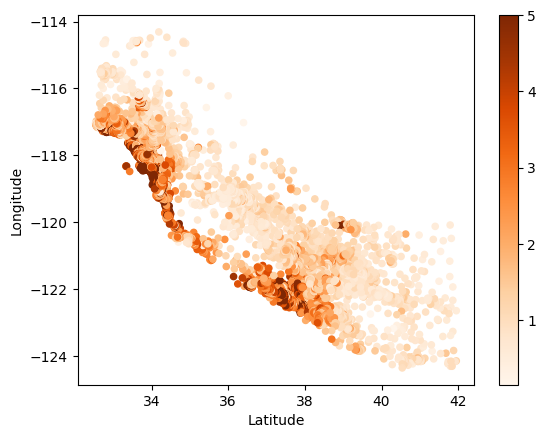

In [3]:
data.plot.scatter(x='Latitude', y='Longitude', c=target, cmap='Oranges')

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=.2, random_state=GLOBAL_RANDOM_STATE, shuffle=True)

In [5]:
ScalerX = StandardScaler()
X_train_stand = ScalerX.fit_transform(X_train)
X_test_stand = ScalerX.transform(X_test)

### Constructing the model


In [6]:
from sklearn.neural_network import MLPRegressor
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [7]:
sklearn_model = MLPRegressor(hidden_layer_sizes=[2**10, 2**7, 2**5], max_iter=20, batch_size=200, validation_fraction=.1, early_stopping=True, verbose=True)
sklearn_model.fit(X_train, Y_train)

Iteration 1, loss = 103.64142375
Validation score: -0.214754
Iteration 2, loss = 0.63984105
Validation score: 0.154537
Iteration 3, loss = 0.55595664
Validation score: 0.323636
Iteration 4, loss = 0.47090913
Validation score: 0.432115
Iteration 5, loss = 0.56261679
Validation score: 0.241147
Iteration 6, loss = 0.43403889
Validation score: 0.439590
Iteration 7, loss = 0.63601866
Validation score: -0.720820
Iteration 8, loss = 0.41892533
Validation score: 0.500390
Iteration 9, loss = 0.37115321
Validation score: 0.258633
Iteration 10, loss = 1.71871662
Validation score: 0.041394
Iteration 11, loss = 0.43258448
Validation score: 0.504885
Iteration 12, loss = 0.34529183
Validation score: 0.470904
Iteration 13, loss = 0.88062041
Validation score: -3.348548
Iteration 14, loss = 0.92728827
Validation score: 0.456901
Iteration 15, loss = 0.34426735
Validation score: 0.514722
Iteration 16, loss = 0.49956673
Validation score: 0.461413
Iteration 17, loss = 0.65873944
Validation score: -1.417203


c:\Users\kaius\.virtualenvs\ML_Lab_1_Group-A-YrkWYMVn\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=200, early_stopping=True,
             hidden_layer_sizes=[1024, 128, 32], max_iter=20, verbose=True)

In [ ]:
#TO DO: implement the same model for the standardized data, experimenting with higher/lower batch sizes

In [9]:
# @markdown
sklearn_model_stand = MLPRegressor(hidden_layer_sizes=[2**10, 2**7, 2**5], max_iter=50, early_stopping=True, verbose=True)
sklearn_model_stand.fit(X_train_stand, Y_train)

Iteration 1, loss = 0.61969545
Validation score: 0.685607
Iteration 2, loss = 0.20837655
Validation score: 0.732506
Iteration 3, loss = 0.18869928
Validation score: 0.734019
Iteration 4, loss = 0.17761918
Validation score: 0.686458
Iteration 5, loss = 0.17368611
Validation score: 0.754774
Iteration 6, loss = 0.16537730
Validation score: 0.764460
Iteration 7, loss = 0.15983592
Validation score: 0.652169
Iteration 8, loss = 0.16322548
Validation score: 0.745074
Iteration 9, loss = 0.15514467
Validation score: 0.750939
Iteration 10, loss = 0.15146154
Validation score: 0.755533
Iteration 11, loss = 0.14825567
Validation score: 0.760012
Iteration 12, loss = 0.14512259
Validation score: 0.774195
Iteration 13, loss = 0.14516215
Validation score: 0.763456
Iteration 14, loss = 0.14335822
Validation score: 0.778406
Iteration 15, loss = 0.13966252
Validation score: 0.770266
Iteration 16, loss = 0.13948411
Validation score: 0.788416
Iteration 17, loss = 0.13903388
Validation score: 0.762553
Iterat

MLPRegressor(early_stopping=True, hidden_layer_sizes=[1024, 128, 32],
             max_iter=50, verbose=True)

### Evaluating the models

We can use different metrics to evaluate the performance of the model:
- Mean Absolute Error
- Mean Squared Error
- $R^2$ or coefficient of determination


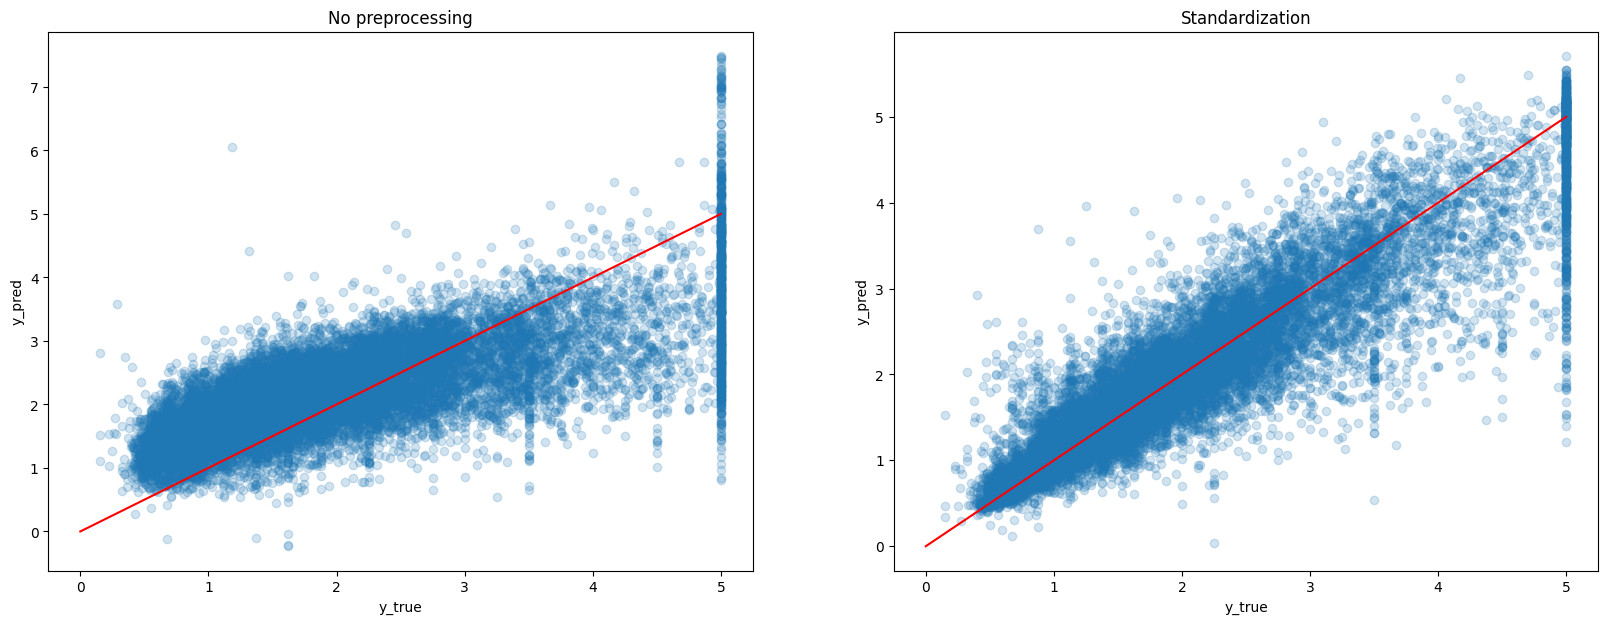

In [10]:
fig, axes = plt.subplots(1,2, figsize=(20,7))
model_input_title = [(sklearn_model, X_train, 'No preprocessing'), (sklearn_model_stand, X_train_stand, 'Standardization')]

for i in range(2):
  model, input, title = model_input_title[i]
  _ = axes[i].scatter(Y_train, model.predict(input), alpha=.2)
  _ = axes[i].plot(range(6),'r')
  _ = axes[i].set_xlabel('y_true')
  _ = axes[i].set_ylabel('y_pred')
  _ = axes[i].set_title(title)


In [ ]:
#TODO: print MSE and MAE. What might be the downsides of using such metrics to evaluate the performance of the algorithm?

In [11]:
#@markdown

Y_pred, Y_pred_stand = sklearn_model.predict(X_test), sklearn_model_stand.predict(X_test_stand)
mae, mae_stand = mean_absolute_error(Y_pred, Y_test), mean_absolute_error(Y_pred_stand, Y_test)
mse, mse_stand = mean_squared_error(Y_pred, Y_test), mean_squared_error(Y_pred_stand, Y_test)

print(f"Mean absolute error of predictions: {mae} (without standardization), {mae_stand} (with standardization)")
print(f"Mean squared error of predictions: {mse} (without standardization), {mse_stand} (with standardization)")

Mean absolute error of predictions: 0.6514250220107216 (without standardization), 0.3403440092130183 (with standardization)
Mean squared error of predictions: 0.6857085628025462 (without standardization), 0.2647678997965337 (with standardization)


# Tensorflow & Keras

`scikit-learn` is extremely user-friendly and recommended when getting warmed-up with ML. However, the implemented models are not flexible enough to suit tailored model implementation. In particular:
<ul>
<li>there is no possibility of customizing layers</li>
<li>default scoring function $R_2$ is hard to overwrite</li>
</ul>


We resort to `tensorflow`, an end-to-end library for Machine Learning that
offers a wide range of model customization and is mantained by Google.







In [12]:
import tensorflow as tf
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.nn import relu, tanh
#https://www.tensorflow.org/api_docs/python/tf/keras/Sequential


tf.random.set_seed(GLOBAL_RANDOM_STATE)


In [15]:
#we can define each layer with different activation functions and initial weight matrices

model_tf = Sequential([Dense(2**10, input_shape=(X_train.shape[1],), activation=relu),
                       Dense(2**7, activation=relu),
                       Dense(2**5, activation=relu),
                       Dense(1)]) #output layer, linear activation function



In [16]:
#we convert input to np.arrays as Tensorflow does not accept pd.DataFrames
X_train_np, Y_train_np, X_test_np, Y_test_np =  X_train.values, Y_train.values, X_test.values, Y_test.values

loss = 'mean_squared_error'
model_tf.compile(loss=loss)
model_tf.fit(X_train_np, Y_train_np, batch_size=200, epochs=50)

Epoch 1/50
83/83 [==============================] - 1s 4ms/step - loss: 3236.6628
Epoch 2/50
83/83 [==============================] - 0s 4ms/step - loss: 183.7524
Epoch 3/50
83/83 [==============================] - 0s 4ms/step - loss: 76.1766
Epoch 4/50
83/83 [==============================] - 0s 4ms/step - loss: 34.7140
Epoch 5/50
83/83 [==============================] - 0s 4ms/step - loss: 26.4900
Epoch 6/50
83/83 [==============================] - 0s 4ms/step - loss: 30.6593
Epoch 7/50
83/83 [==============================] - 0s 4ms/step - loss: 8.3722
Epoch 8/50
83/83 [==============================] - 0s 3ms/step - loss: 3.1215
Epoch 9/50
83/83 [==============================] - 0s 4ms/step - loss: 9.2462
Epoch 10/50
83/83 [==============================] - 0s 4ms/step - loss: 2.4652
Epoch 11/50
83/83 [==============================] - 0s 4ms/step - loss: 3.4183
Epoch 12/50
83/83 [==============================] - 0s 4ms/step - loss: 2.6384
Epoch 13/50
83/83 [=====================

In [ ]:
#TODO: change activation function of the last hidden layer to tanh and reevaluate the model

In [17]:
# @title
model_tf.layers[2].activation = tanh

for i, layer in enumerate(model_tf.layers):
    try:
        print(f"Activation function for layer {i}: {layer.activation}")
    except AttributeError:
        print(f"Layer {i} uses no activation function")

Activation function for layer 0: <function relu at 0x00000245257CB0A0>
Activation function for layer 1: <function relu at 0x00000245257CB0A0>
Activation function for layer 2: <function tanh at 0x00000245254375B0>
Activation function for layer 3: <function linear at 0x000002452B3325F0>


In [18]:
# @title
model_tf.fit(X_train_np, Y_train_np, batch_size=200, epochs=50)

Epoch 1/50
83/83 [==============================] - 0s 4ms/step - loss: 0.7662
Epoch 2/50
83/83 [==============================] - 0s 4ms/step - loss: 0.7406
Epoch 3/50
83/83 [==============================] - 0s 3ms/step - loss: 0.7214
Epoch 4/50
83/83 [==============================] - 0s 3ms/step - loss: 0.7609
Epoch 5/50
83/83 [==============================] - 0s 3ms/step - loss: 0.7254
Epoch 6/50
83/83 [==============================] - 0s 3ms/step - loss: 0.7104
Epoch 7/50
83/83 [==============================] - 0s 3ms/step - loss: 0.7908
Epoch 8/50
83/83 [==============================] - 0s 4ms/step - loss: 0.8493
Epoch 9/50
83/83 [==============================] - 0s 4ms/step - loss: 0.7304
Epoch 10/50
83/83 [==============================] - 0s 4ms/step - loss: 0.7115
Epoch 11/50
83/83 [==============================] - 0s 4ms/step - loss: 0.7068
Epoch 12/50
83/83 [==============================] - 0s 3ms/step - loss: 0.7038
Epoch 13/50
83/83 [==============================

# PyTorch

Another established alternative is `PyTorch`, a library for Machine Learning that is becoming more and more <a href=" https://paperswithcode.com/trends">popular</a> for Deep Learning and is backed by Facebook. For advanced user, `PyTorch` offers following advantages:

<ul><li>Easier debugging</li>
<li>Better processing speed</li>
</ul>

In [ ]:
!pip install torch torchvision

In [19]:
from torch import Tensor
from torch.nn import Module, Linear
from torch.nn.functional import relu, tanh
#https://pytorch.org/docs/stable/generated/torch.nn.Module.html


In [26]:
X_train_torch = Tensor(X_train.values) #torch only accepts torch.Tensors as input

In [28]:
class Model(Module):

    def __init__(self):
        super().__init__()

        self.layer1 = Linear(X_train.shape[0], 2**10)
        self.layer2 = Linear(2**10, 2**5)


    def forward(self, x):

        x = self.layer1(x)
        x = relu(x)
        x = self.layer2(x)
        x = relu(x)

        return x